# Desafio Cinematográfico

A nova configuração do mercado cinematográfico exige do cineasta — e dos artistas em geral — que se torne empreendedor. Isso significa resolver problemas que não são propriamente artísticos em boa parte do tempo.
Captação de clientes, atendimento, relatórios, comprovação de gastos, controle financeiro… São muitas as habilidades que um profissional autônomo da área de Cinema deve desenvolver, mesmo que superficialmente.

Uma rede de cinemas da cidade de São Carlos/ SP gostaria de otimizar a sua renda, hoje eles possuem 2 salas de cinema uma maior, com capacidade para 150 pessoas e 1 sala menor, com capacidade para 84 pessoas.
A cada mês, a rede precisa decidir quais filmes adquirir para obter o maior número de espectadores e gostariam de fazer uma decisão mais baseada em dados. Hoje é a Juliana, funcionária mais antiga do cinema que toma essas decisões muito baseada na sua experiência a 6 anos trabalhando no ramo, mas muitas vezes as sessões não enchem como gostariam.

Também existe a possibilidade de adquirir uma nova área no shopping onde o cinema está localizado para a criação de uma sala VIP, com 100 lugares, mas existe uma dúvida se haverá retorno no investimento, se o mercado de filmes realmente está crescendo e qual tipo de filme deveria passar nessa sala nova para justificar o preço do ingresso, que custará 30% a mais do que o valor do ingresso nas salas atuais.

A Juliana, também se formou recentemente em cinema e tem pressionado o administrador do cinema a adquirir mais filmes nacionais e dublados, a teoria dela é que isso irá atrair mais clientes para o cinema, principalmente fora dos períodos de férias escolares.

Gostaríamos muito da sua ajuda para conseguir responder as seguintes perguntas:
- O mercado de filmes está crescendo ou diminuindo?
- A teoria da Juliana que os filmes nacionais têm tido cada vez mais aceitação é verdade?
- Quais outros insights podemos tirar sobre os filmes?
- Existe algum padrão em filmes que tem alta renda?
- Existe algum padrão para filmes que ficam mais tempo em cartaz do que outros?
- Existem distribuidoras que trazem filmes com mais renda?

Além disso, seria muito bom que tivéssemos um modelo que ao receber um filme, se vale a pena comprá-lo, e nos dissesse quanto tempo devemos deixar em cartaz ou quantas sessões devemos criar para ele.

**Sobre a Fonte de Dados**

Criada em 2001, a Agência Nacional de Cinema é uma agência reguladora criada em 2001. Mesmo com autonomia administrativa em relação ao governo, sua diretoria é aprovada pelo Senado e está submetida ao Ministério da Cidadania depois da extinção do Ministério da Cultura. Para ajudar os profissionais desta área, o Ministério fornece dados públicos sobre o mercado nos últimos anos:

A Ancine oferece dados públicos relativos a bilheteria semanal das obras informadas pelas distribuidoras
https://dados.gov.br/dataset/relatorio-de-bilheteira-semanal-de-obras-informada-pelas-distribuidoras

Os dados estão disponíveis nos formatos XML, CSV ou Json
E possuem as seguintes colunas:

TITULO_ORIGINAL: String – Nome original do filme

TITULO_BRASILEIRO: String – Nome do filme no Brasil

GENERO: String Genero do Filme, podendo ser Ficção, Animação, etc.

PAIS_ORIGEM: String País de Origem da produtora do filme

CPB_ROE: String Código do Filme

COPIAS: Numero inteiro -  Quantas cópias foram distribuidas

SALAS: Numero inteiro – Quantas salas de cinema passaram o filme

DT_INICIO_EXIBICAO: Data – Data de estréia do filme no Brasil

DT_FIM_EXIBICAO: Data – Data da ultima sessão do filme no Brasil

PUBLICO: Numero inteiro Quantidade de expectadores

RENDA: Numero com decimais: Valores arrecadados com bilheteria

RAZAO_SOCIAL_DISTRIBUIDORA: String – Nome da distribuidora

REGISTRO_DISTRIBUIDORA: Numero inteiro – Numero do registro na Ancine

CNPJ_DISTRIBUIDORA: String – CNPJ da distribuidora

ANO_CINEMATOGRAFICO: Numero – Ano da produção

In [1]:
# Importando as bibliotecas que serão usadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bilheteria.csv')
df.head()

,TITULO_ORIGINAL,TITULO_BRASILEIRO,GENERO,PAIS_ORIGEM,CPB_ROE,COPIAS,SALAS,DT_INICIO_EXIBICAO,DT_FIM_EXIBICAO,PUBLICO,RENDA,RAZAO_SOCIAL_DISTRIBUIDORA,REGISTRO_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA,ANO_CINEMATOGRAFICO
0,COLLEGE,COLEGIAIS EM APUROS,Ficção,Estados Unidos,E1600557700000,8,8,02/01/2009,08/01/2009,833,5325,ANTONIO FERNANDES FILMES LTDA,532,02.668.665/0001-01,2009
1,O ABORTO DOS OUTROS,NaN,Documentário,Brasil,B0800890900000,1,1,02/01/2009,08/01/2009,40,196,ANTONIO FERNANDES FILMES LTDA,532,02.668.665/0001-01,2009
2,ONDE ANDARÁ DULCE VEIGA?,NaN,Ficção,"Brasil, Chile",B0700801600000,1,1,02/01/2009,08/01/2009,66,210,ANTONIO FERNANDES FILMES LTDA,532,02.668.665/0001-01,2009
3,QUAND J'ETAIS CHANTEUR,QUANDO ESTOU AMANDO,Ficção,França,E1600545500000,1,1,02/01/2009,08/01/2009,103,"842,92",ANTONIO FERNANDES FILMES LTDA,532,02.668.665/0001-01,2009
4,REC,REC,Ficção,Espanha,E1600619700000,2,2,02/01/2009,08/01/2009,252,1575,ANTONIO FERNANDES FILMES LTDA,532,02.668.665/0001-01,2009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51176 entries, 0 to 51175
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   TITULO_ORIGINAL             51176 non-null  object
 1   TITULO_BRASILEIRO           38363 non-null  object
 2   GENERO                      51176 non-null  object
 3   PAIS_ORIGEM                 51176 non-null  object
 4   CPB_ROE                     51176 non-null  object
 5   COPIAS                      51176 non-null  int64 
 6   SALAS                       51176 non-null  int64 
 7   DT_INICIO_EXIBICAO          51176 non-null  object
 8   DT_FIM_EXIBICAO             51176 non-null  object
 9   PUBLICO                     51176 non-null  int64 
 10  RENDA                       51176 non-null  object
 11  RAZAO_SOCIAL_DISTRIBUIDORA  51176 non-null  object
 12  REGISTRO_DISTRIBUIDORA      51176 non-null  int64 
 13  CNPJ_DISTRIBUIDORA          51176 non-null  ob

In [4]:
df.shape

(51176, 15)

In [5]:
# Verificando se existem valores faltantes nos dados
df.isna().any()

TITULO_ORIGINAL               False
TITULO_BRASILEIRO              True
GENERO                        False
PAIS_ORIGEM                   False
CPB_ROE                       False
COPIAS                        False
SALAS                         False
DT_INICIO_EXIBICAO            False
DT_FIM_EXIBICAO               False
PUBLICO                       False
RENDA                         False
RAZAO_SOCIAL_DISTRIBUIDORA    False
REGISTRO_DISTRIBUIDORA        False
CNPJ_DISTRIBUIDORA            False
ANO_CINEMATOGRAFICO           False
dtype: bool

In [6]:
# Verificando quantos valores faltantes existem nos dados
df.isna().sum()

TITULO_ORIGINAL                   0
TITULO_BRASILEIRO             12813
GENERO                            0
PAIS_ORIGEM                       0
CPB_ROE                           0
COPIAS                            0
SALAS                             0
DT_INICIO_EXIBICAO                0
DT_FIM_EXIBICAO                   0
PUBLICO                           0
RENDA                             0
RAZAO_SOCIAL_DISTRIBUIDORA        0
REGISTRO_DISTRIBUIDORA            0
CNPJ_DISTRIBUIDORA                0
ANO_CINEMATOGRAFICO               0
dtype: int64

# Eliminando as variáveis de valor único

In [7]:
df.drop(['TITULO_BRASILEIRO', 'CPB_ROE', 'REGISTRO_DISTRIBUIDORA', 'CNPJ_DISTRIBUIDORA'], axis=1, inplace=True)

# Transformando e criando variáveis

In [8]:
# Variável: filmes nacionais e internacionais
df['internacional_nacional'] = df['PAIS_ORIGEM']

origem = []

for i in df['PAIS_ORIGEM']:
    if 'Brasil' in i:
        origem.append('1')
    else:
        origem.append('0')
        
df['internacional_nacional'] = origem
df

,TITULO_ORIGINAL,GENERO,PAIS_ORIGEM,COPIAS,SALAS,DT_INICIO_EXIBICAO,DT_FIM_EXIBICAO,PUBLICO,RENDA,RAZAO_SOCIAL_DISTRIBUIDORA,ANO_CINEMATOGRAFICO,internacional_nacional
0,COLLEGE,Ficção,Estados Unidos,8,8,02/01/2009,08/01/2009,833,5325,ANTONIO FERNANDES FILMES LTDA,2009,0
1,O ABORTO DOS OUTROS,Documentário,Brasil,1,1,02/01/2009,08/01/2009,40,196,ANTONIO FERNANDES FILMES LTDA,2009,1
2,ONDE ANDARÁ DULCE VEIGA?,Ficção,"Brasil, Chile",1,1,02/01/2009,08/01/2009,66,210,ANTONIO FERNANDES FILMES LTDA,2009,1
3,QUAND J'ETAIS CHANTEUR,Ficção,França,1,1,02/01/2009,08/01/2009,103,"842,92",ANTONIO FERNANDES FILMES LTDA,2009,0
4,REC,Ficção,Espanha,2,2,02/01/2009,08/01/2009,252,1575,ANTONIO FERNANDES FILMES LTDA,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51171,BELLE DE JOUR,Ficção,"França, Itália",4,4,28/12/2017,03/01/2018,218,3058,ZETA FILMES LTDA - ME,2017,0
51172,BLOW-UP,Ficção,"Estados Unidos, Itália, Reino Unido",1,1,28/12/2017,03/01/2018,16,80,ZETA FILMES LTDA - ME,2017,0
51173,COLO,Ficção,Portugal,2,2,28/12/2017,03/01/2018,60,464,ZETA FILMES LTDA - ME,2017,0
51174,"GRADUATE, THE",Ficção,Estados Unidos,1,1,28/12/2017,03/01/2018,12,96,ZETA FILMES LTDA - ME,2017,0


In [9]:
df['internacional_nacional'].value_counts()

0    38221
1    12955
Name: internacional_nacional, dtype: int64

In [10]:
# Transformando a variável de data de exibição em datetime
df['DT_INICIO_EXIBICAO'] = pd.to_datetime(df['DT_INICIO_EXIBICAO'], format = '%d/%m/%Y')

In [11]:
df['DT_FIM_EXIBICAO'] = pd.to_datetime(df['DT_FIM_EXIBICAO'], format = '%d/%m/%Y')

In [12]:
# Dia da semana (0 é segunda e 6 é domingo)
df['DIA_DA_SEMANA_INICIO']=df['DT_INICIO_EXIBICAO'].apply(lambda x:x.weekday())

# Dia
df['DIA_INICIO']=df['DT_INICIO_EXIBICAO'].apply(lambda x:x.day)

# Mês
df['MES_INICIO']=df['DT_INICIO_EXIBICAO'].apply(lambda x:x.month)

# Ano
df['ANO_INICIO']=df['DT_INICIO_EXIBICAO'].apply(lambda x:x.year)

In [13]:
# Dia da semana (0 é segunda e 6 é domingo)
df['DIA_DA_SEMANA_FIM']=df['DT_FIM_EXIBICAO'].apply(lambda x:x.weekday())

# Dia
df['DIA_FIM']=df['DT_FIM_EXIBICAO'].apply(lambda x:x.day)

# Mês
df['MES_FIM']=df['DT_FIM_EXIBICAO'].apply(lambda x:x.month)

# Ano 
df['ANO_FIM']=df['DT_FIM_EXIBICAO'].apply(lambda x:x.year) 

In [14]:
# Convertendo os dias da semana para facilitar a leitura

def converter_dia_da_semana(dia_da_semana):
    dic_dia = {0:'Segunda', 1:'Terça', 2:'Quarta', 3:'Quinta', 4:'Sexta', 5:'Sábado', 6:'Domingo'}
    return dic_dia[dia_da_semana]


df['DIA_DA_SEMANA_INICIO_STRING']=df['DIA_DA_SEMANA_INICIO'].apply(lambda x: converter_dia_da_semana(x))
df['DIA_DA_SEMANA_FIM_STRING']=df['DIA_DA_SEMANA_FIM'].apply(lambda x: converter_dia_da_semana(x))

In [15]:
# Criando uma variável de tempo de exibição

df['tempo_exibicao'] = df['DT_FIM_EXIBICAO'] - df['DT_INICIO_EXIBICAO']

In [16]:
# Transformando a variável renda em numérica
df['RENDA'] = df['RENDA'].str.replace(',','.')

In [17]:
df['RENDA'] = df['RENDA'].astype(float)

# Padronizando colunas (nomes)

In [18]:
# Letras minusculas
df.columns= df.columns.str.lower()
df.head()

,titulo_original,genero,pais_origem,copias,salas,dt_inicio_exibicao,dt_fim_exibicao,publico,renda,razao_social_distribuidora,...,dia_inicio,mes_inicio,ano_inicio,dia_da_semana_fim,dia_fim,mes_fim,ano_fim,dia_da_semana_inicio_string,dia_da_semana_fim_string,tempo_exibicao
0,COLLEGE,Ficção,Estados Unidos,8,8,2009-01-02,2009-01-08,833,5325.00,ANTONIO FERNANDES FILMES LTDA,...,2,1,2009,3,8,1,2009,Sexta,Quinta,6 days
1,O ABORTO DOS OUTROS,Documentário,Brasil,1,1,2009-01-02,2009-01-08,40,196.00,ANTONIO FERNANDES FILMES LTDA,...,2,1,2009,3,8,1,2009,Sexta,Quinta,6 days
2,ONDE ANDARÁ DULCE VEIGA?,Ficção,"Brasil, Chile",1,1,2009-01-02,2009-01-08,66,210.00,ANTONIO FERNANDES FILMES LTDA,...,2,1,2009,3,8,1,2009,Sexta,Quinta,6 days
3,QUAND J'ETAIS CHANTEUR,Ficção,França,1,1,2009-01-02,2009-01-08,103,842.92,ANTONIO FERNANDES FILMES LTDA,...,2,1,2009,3,8,1,2009,Sexta,Quinta,6 days
4,REC,Ficção,Espanha,2,2,2009-01-02,2009-01-08,252,1575.00,ANTONIO FERNANDES FILMES LTDA,...,2,1,2009,3,8,1,2009,Sexta,Quinta,6 days


# Observando mais as variáveis

<AxesSubplot:xlabel='renda', ylabel='dia_da_semana_inicio_string'>

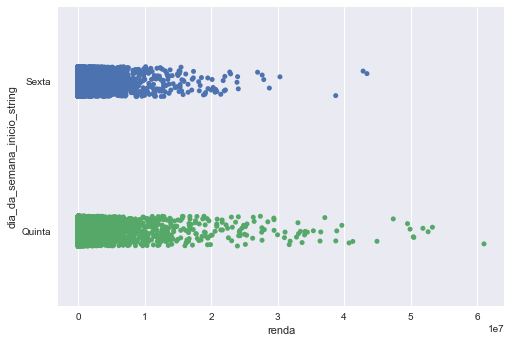

In [19]:
sns.stripplot(data=df, x="renda", y="dia_da_semana_inicio_string")

<AxesSubplot:xlabel='renda', ylabel='dia_da_semana_fim_string'>

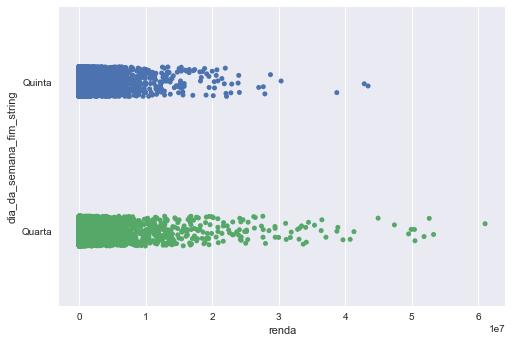

In [20]:
sns.stripplot(data=df, x="renda", y="dia_da_semana_fim_string")

Não tem muito o que trabalhar com dias da semana nesse dataset, porque cada filme é inserido por semana e não temos como saber sobre cada dia de sessão separadamente.

# Variável copias

O gráfico abaixo mostra o problema quando o número de cópias é zero, ademais parece existir uma correlação bem forte entre salas e cópias. Sendo assim, vamos optar por excluir a coluna cópias.

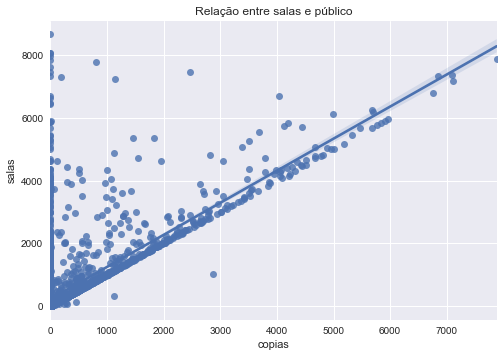

In [21]:
df['copias'].value_counts()

0      19473
1      10937
2       3899
3       2325
4       1615
       ...  
483        1
370        1
313        1
766        1
500        1
Name: copias, Length: 681, dtype: int64

In [22]:
df.drop(['copias'], axis=1, inplace=True)

# Novo Dataset Agrupado por TITULO_ORIGINAL

Muitos filmes com o mesmo título estão em diferentes linhas devido ao fato de que, como as bilheterias são computadas semana a semana, os mesmos filmes entram mais de uma vez na lista. É possível observar isto no exemplo abaixo com Os Vingadores, em que o mesmo filme aparece 22 vezes.

In [23]:
df.loc[df['titulo_original'] == 'THE AVENGERS']

,titulo_original,genero,pais_origem,salas,dt_inicio_exibicao,dt_fim_exibicao,publico,renda,razao_social_distribuidora,ano_cinematografico,...,dia_inicio,mes_inicio,ano_inicio,dia_da_semana_fim,dia_fim,mes_fim,ano_fim,dia_da_semana_inicio_string,dia_da_semana_fim_string,tempo_exibicao
19432,THE AVENGERS,Ficção,Estados Unidos,1042,2012-04-27,2012-05-03,3540885,42865248.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,27,4,2012,3,3,5,2012,Sexta,Quinta,6 days
19548,THE AVENGERS,Ficção,Estados Unidos,1042,2012-05-04,2012-05-10,2416994,28762632.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,4,5,2012,3,10,5,2012,Sexta,Quinta,6 days
19665,THE AVENGERS,Ficção,Estados Unidos,937,2012-05-11,2012-05-17,1631595,19496567.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,11,5,2012,3,17,5,2012,Sexta,Quinta,6 days
19781,THE AVENGERS,Ficção,Estados Unidos,914,2012-05-18,2012-05-24,1279295,15568218.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,18,5,2012,3,24,5,2012,Sexta,Quinta,6 days
19894,THE AVENGERS,Ficção,Estados Unidos,665,2012-05-25,2012-05-31,747787,8655069.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,25,5,2012,3,31,5,2012,Sexta,Quinta,6 days
20002,THE AVENGERS,Ficção,Estados Unidos,747,2012-06-01,2012-06-07,609031,6861170.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,1,6,2012,3,7,6,2012,Sexta,Quinta,6 days
20101,THE AVENGERS,Ficção,Estados Unidos,436,2012-06-08,2012-06-14,354064,3773251.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,8,6,2012,3,14,6,2012,Sexta,Quinta,6 days
20198,THE AVENGERS,Ficção,Estados Unidos,350,2012-06-15,2012-06-21,164956,1656024.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,15,6,2012,3,21,6,2012,Sexta,Quinta,6 days
20294,THE AVENGERS,Ficção,Estados Unidos,205,2012-06-22,2012-06-28,70169,664082.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,22,6,2012,3,28,6,2012,Sexta,Quinta,6 days
20387,THE AVENGERS,Ficção,Estados Unidos,62,2012-06-29,2012-07-05,17767,173688.0,THE WALT DISNEY COMPANY (BRASIL) LTDA.,2012,...,29,6,2012,3,5,7,2012,Sexta,Quinta,6 days


**A fim de "somar" os filmes em uma mesma linha, será feito um agrupamento pela variável 'título_original'**

In [24]:
tempo_exibicao2 = df.groupby('titulo_original')['tempo_exibicao'].sum()
df2 = pd.DataFrame(tempo_exibicao2)

In [25]:
df2 = df2.sort_values(by ='tempo_exibicao', ascending=False)

In [26]:
df2.head()

,tempo_exibicao
titulo_original,
RELATOS SALVAJES,978 days
COEURS,714 days
O MENINO E O MUNDO,455 days
LE PETIT NICOLAS,432 days
FROZEN,413 days


In [27]:
renda2 = df.groupby('titulo_original')['renda'].sum()
df3 = pd.DataFrame(renda2)

In [28]:
pd.options.display.float_format = '{:.4f}'.format 

In [29]:
df3 = df3.sort_values(by ='renda', ascending=False) 

In [30]:
publico2 = df.groupby('titulo_original')['publico'].sum()
df4 = pd.DataFrame(publico2)

In [31]:
df4 = df4.sort_values(by ='publico', ascending=False)

In [32]:
salas2 = df.groupby('titulo_original')['salas'].sum()
df5= pd.DataFrame(salas2)

In [33]:
df5 = df5.sort_values(by='salas', ascending=False)

In [34]:
ano2 = df.groupby('titulo_original')['ano_cinematografico'].max()
df6 = pd.DataFrame(ano2)

In [35]:
df6 = df6.sort_values(by ='ano_cinematografico', ascending=False)

In [36]:
# dtype object 
distribuidora2 = df[['titulo_original', 'razao_social_distribuidora']]

In [37]:
df7 = pd.DataFrame(distribuidora2)

In [38]:
df7.drop_duplicates(subset='titulo_original', inplace=True)

In [39]:
df7.head()

,titulo_original,razao_social_distribuidora
0,COLLEGE,ANTONIO FERNANDES FILMES LTDA
1,O ABORTO DOS OUTROS,ANTONIO FERNANDES FILMES LTDA
2,ONDE ANDARÁ DULCE VEIGA?,ANTONIO FERNANDES FILMES LTDA
3,QUAND J'ETAIS CHANTEUR,ANTONIO FERNANDES FILMES LTDA
4,REC,ANTONIO FERNANDES FILMES LTDA


In [40]:
genero2= df[['titulo_original', 'genero']]
df8=pd.DataFrame(genero2)

In [41]:
df8.drop_duplicates(subset='titulo_original', inplace=True)

In [42]:
internacional_nacional2 = df[['titulo_original', 'internacional_nacional']]
df9 = pd.DataFrame(internacional_nacional2)

In [43]:
df9.drop_duplicates(subset='titulo_original', inplace=True)

In [44]:
data_frames = [df4, df2, df3, df5, df6, df7, df8, df9]

In [45]:
from functools import reduce

In [46]:
# Juntando os dataframes
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['titulo_original'],
                                            how='outer'), data_frames)

In [47]:
# Observando o dataset criado
df_merged.head(20) 

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional
0,OS DEZ MANDAMENTOS,11305479,222 days,116833026.8800,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,1
1,TROPA DE ELITE 2,11146723,168 days,103461153.7400,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,1
2,THE AVENGERS,10911371,132 days,129595590.0000,6693,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0
3,THE AVENGERS: AGE OF ULTRON,10129071,132 days,146184931.0000,7881,2015,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0
4,FURIOUS SEVEN,9857968,138 days,142466037.0200,5961,2016,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,Ficção,0
5,CAPTAIN AMERICA: CIVIL WAR,9617668,162 days,143337776.0000,7236,2017,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0
6,THE TWILIGHT SAGA: BREAKING DAWN PART 2,9596296,108 days,100816443.8900,7331,2013,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,0
7,ICE AGE: DAWN OF THE DINOSSAURS,9281202,168 days,81126935.0000,6202,2010,FOX FILM DO BRASIL LTDA,Animação,0
8,MINHA MÃE É UMA PEÇA 2,9234363,108 days,124681177.8200,6462,2017,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,Ficção,1
9,AVATAR,9111628,174 days,102346712.0000,7358,2010,FOX FILM DO BRASIL LTDA,Ficção,0


In [48]:
# Verificando se o problema foi resolvido com o mesmo exemplo de Os Vingadores

df_merged.loc[df_merged['titulo_original'] == 'THE AVENGERS']

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional
2,THE AVENGERS,10911371,132 days,129595590.0000,6693,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0


In [49]:
df_merged.to_csv('Bilheteria2.csv')